In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
bank_data = pd.read_csv('/home/adarsh/Desktop/Machine Learning Projects/Churn_Modelling.csv')

In [3]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
bank_data.shape

(10000, 14)

### Checking null value

In [5]:
bank_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Exploratory data analysis

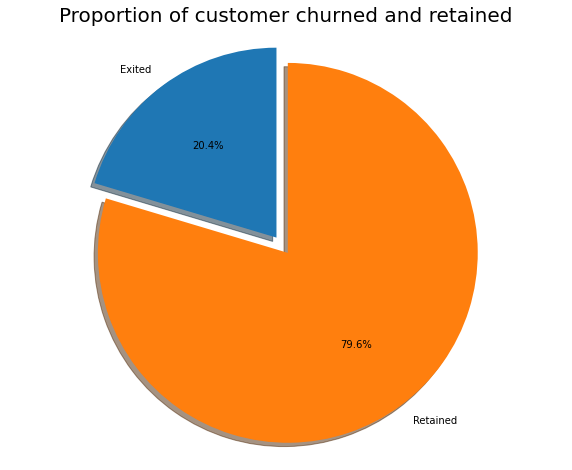

In [6]:
labels = 'Exited', 'Retained'
sizes = [bank_data.Exited[bank_data['Exited']==1].count(), bank_data.Exited[bank_data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

### Conclusion : - 20 Percent customer has churned only. Machine learning model accuracy must be 80 percent so that it is useful for the bank.

In [7]:
Bank_data_geography_wise = bank_data.groupby('Geography')['Exited'].value_counts().unstack().add_prefix('').rename_axis(None, axis =1).reset_index()

In [8]:
Bank_data_geography_wise.head()

,Geography,0,1
0,France,4204,810
1,Germany,1695,814
2,Spain,2064,413


In [9]:
Bank_data_geography_wise.columns =['Geography', 'Not_Exited', 'Exited']

In [10]:
Bank_data_geography_wise.head()

,Geography,Not_Exited,Exited
0,France,4204,810
1,Germany,1695,814
2,Spain,2064,413


In [11]:
Bank_data_geography_wise["Total"] = Bank_data_geography_wise["Not_Exited"] + Bank_data_geography_wise["Exited"]

In [12]:
Bank_data_geography_wise["Percentage_Exited"] = (Bank_data_geography_wise["Exited"] / Bank_data_geography_wise["Total"]) * 100

In [13]:
Bank_data_geography_wise["Percentage_Not_Exited"] = (Bank_data_geography_wise["Not_Exited"] / Bank_data_geography_wise["Total"]) * 100

In [14]:
Bank_data_geography_wise.head()

,Geography,Not_Exited,Exited,Total,Percentage_Exited,Percentage_Not_Exited
0,France,4204,810,5014,16.154767,83.845233
1,Germany,1695,814,2509,32.443204,67.556796
2,Spain,2064,413,2477,16.673395,83.326605


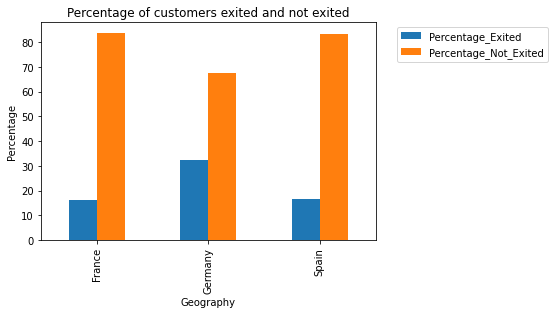

In [15]:
Bank_data_geography_wise.plot(x="Geography", y=["Percentage_Exited", "Percentage_Not_Exited"], kind="bar")
plt.xlabel('Geography')
plt.ylabel('Percentage')
plt.title('Percentage of customers exited and not exited')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

### Conclusion : - In geograpghy Germany more customers exited compared to spain and france

In [16]:
bank_data_gender_wise = bank_data.groupby('Gender')['Exited'].value_counts().unstack().add_prefix('').rename_axis(None, axis =1).reset_index()

In [17]:
bank_data_gender_wise.head()

,Gender,0,1
0,Female,3404,1139
1,Male,4559,898


In [18]:
bank_data_gender_wise.columns = ['Gender','Not_Exited','Exited']

In [19]:
bank_data_gender_wise["Total"] = bank_data_gender_wise['Not_Exited'] + bank_data_gender_wise['Exited']

In [20]:
bank_data_gender_wise.head()

,Gender,Not_Exited,Exited,Total
0,Female,3404,1139,4543
1,Male,4559,898,5457


In [21]:
bank_data_gender_wise["Percentage_Exited"] = (bank_data_gender_wise["Exited"] / bank_data_gender_wise["Total"]) * 100

In [22]:
bank_data_gender_wise["Percentage_Not_Exited"] = (bank_data_gender_wise["Not_Exited"] / bank_data_gender_wise["Total"]) * 100

In [23]:
bank_data_gender_wise.head()

,Gender,Not_Exited,Exited,Total,Percentage_Exited,Percentage_Not_Exited
0,Female,3404,1139,4543,25.071539,74.928461
1,Male,4559,898,5457,16.455928,83.544072


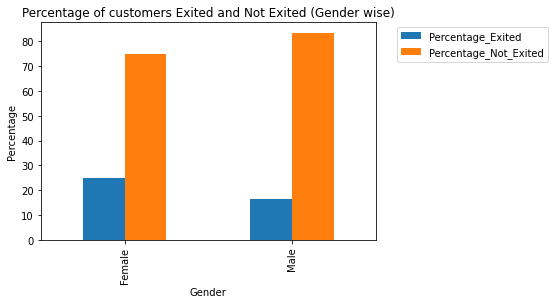

In [24]:
bank_data_gender_wise.plot(x = "Gender", y = ["Percentage_Exited", "Percentage_Not_Exited"], kind = "bar")
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Percentage of customers Exited and Not Exited (Gender wise)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

### Conclusion : - More female exited than men

In [25]:
print("Min Age in dataset", min(bank_data["Age"].unique()))
print("Max Tenure in dataset", max(bank_data["Age"].unique()))

Min Age in dataset 18
Max Tenure in dataset 92


In [26]:
bank_data["Age_Group"] = pd.cut(x=bank_data['Age'], bins = [0, 20 , 35, 50, 70, 100], 
                                labels = ["Teenager","Younger","Elder","Older","Senior Citizen"])

In [27]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Elder
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Elder
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Elder
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Elder
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Elder


In [28]:
bank_data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Elder
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Younger
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Elder
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Elder
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,Younger


In [29]:
bank_data_age_group_wise = bank_data.groupby('Age_Group')['Exited'].value_counts().unstack().add_prefix('').rename_axis(None , axis = 1).reset_index()

In [30]:
bank_data_age_group_wise.head()

,Age_Group,0,1
0,Teenager,84,5
1,Younger,3722,342
2,Elder,3459,1127
3,Older,576,552
4,Senior Citizen,122,11


In [31]:
bank_data_age_group_wise.columns = ["Age_Group","Not_Exited","Exited"]

In [32]:
bank_data_age_group_wise.head()

,Age_Group,Not_Exited,Exited
0,Teenager,84,5
1,Younger,3722,342
2,Elder,3459,1127
3,Older,576,552
4,Senior Citizen,122,11


In [33]:
bank_data_age_group_wise["Total"] = bank_data_age_group_wise["Not_Exited"] + bank_data_age_group_wise["Exited"]

In [34]:
bank_data_age_group_wise["Percentage_Exited"] = (bank_data_age_group_wise["Exited"] / bank_data_age_group_wise["Total"]) * 100

In [35]:
bank_data_age_group_wise["Percentage_Not_Exited"] = (bank_data_age_group_wise["Not_Exited"] / bank_data_age_group_wise["Total"]) * 100

In [36]:
bank_data_age_group_wise.head()

,Age_Group,Not_Exited,Exited,Total,Percentage_Exited,Percentage_Not_Exited
0,Teenager,84,5,89,5.617978,94.382022
1,Younger,3722,342,4064,8.415354,91.584646
2,Elder,3459,1127,4586,24.574793,75.425207
3,Older,576,552,1128,48.936170,51.063830
4,Senior Citizen,122,11,133,8.270677,91.729323


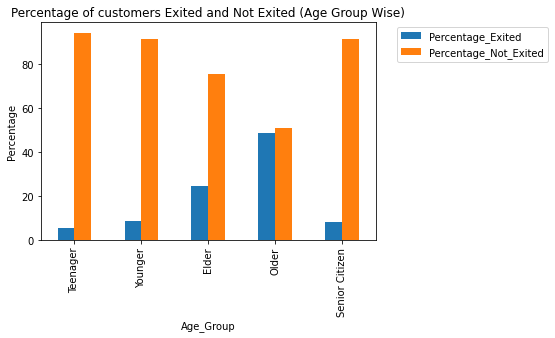

In [37]:
bank_data_age_group_wise.plot(x = "Age_Group", y = ["Percentage_Exited", "Percentage_Not_Exited"], kind = "bar")
plt.xlabel('Age_Group')
plt.ylabel('Percentage')
plt.title('Percentage of customers Exited and Not Exited (Age Group Wise)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

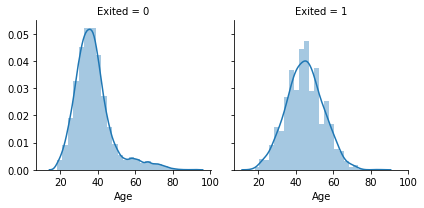

In [38]:
g = sns.FacetGrid(bank_data, col = "Exited")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

### Younger customer stick with the company compare to older

### Conclusion : - Most of the customer exited are from older age group (50 to 70 years)

Text(0, 0.5, 'Customer _Exited (1 = True, 0 = False) ')

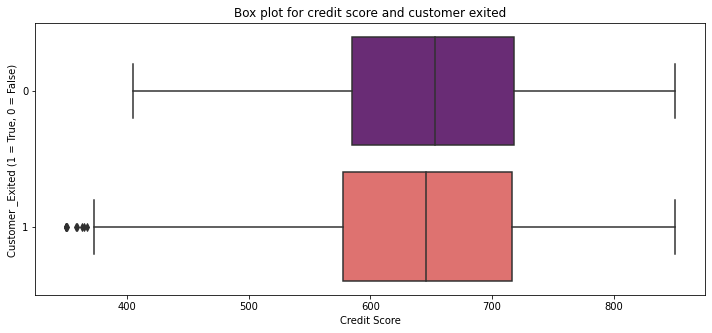

In [39]:
plt.figure(figsize=(12,5))
plt.title("Box plot for credit score and customer exited")
sns.boxplot(y="Exited", x="CreditScore", data = bank_data, orient="h", palette = 'magma')
plt.xlabel('Credit Score')
plt.ylabel('Customer _Exited (1 = True, 0 = False) ')

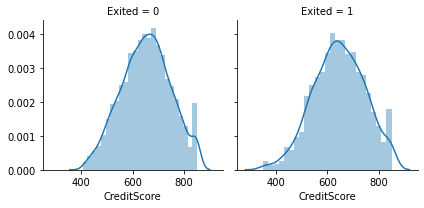

In [40]:
g = sns.FacetGrid(bank_data, col = "Exited")
g.map(sns.distplot, "CreditScore", bins = 25)
plt.show()

### It seems that there is no relation between creditscore and customer exited

Text(0, 0.5, 'Customer _Exited (1 = True, 0 = False) ')

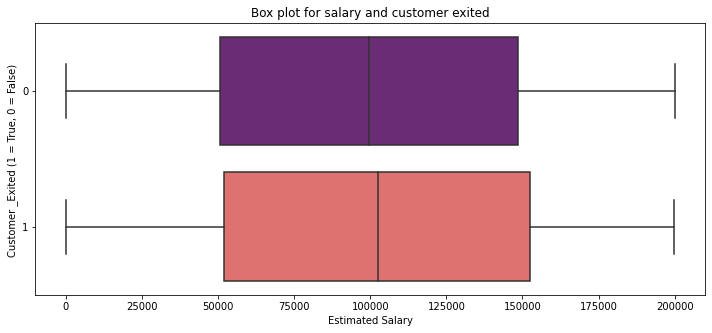

In [41]:
plt.figure(figsize=(12,5))
plt.title("Box plot for salary and customer exited")
sns.boxplot(y="Exited", x="EstimatedSalary", data = bank_data, orient="h", palette = 'magma')
plt.xlabel('Estimated Salary')
plt.ylabel('Customer _Exited (1 = True, 0 = False) ')

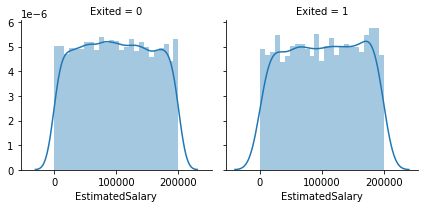

In [42]:
g = sns.FacetGrid(bank_data, col = "Exited")
g.map(sns.distplot, "EstimatedSalary", bins = 25)
plt.show()

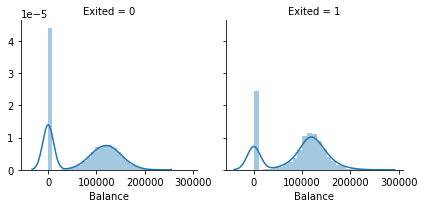

In [43]:
g = sns.FacetGrid(bank_data, col = "Exited")
g.map(sns.distplot, "Balance", bins = 25)
plt.show()

### It seems that there is no so-relation between balance and estimated salary

### Data Prepration

In [44]:
bank_data = pd.get_dummies(bank_data, columns=["Geography"], drop_first = True)

In [45]:
bank_data = pd.get_dummies(bank_data, columns = ["Gender"])

In [46]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,Elder,0,0,1,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,Elder,0,1,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,Elder,0,0,1,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,Elder,0,0,1,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,Elder,0,1,1,0


### Dropping columns not required

In [47]:
bank_data.drop(['RowNumber','CustomerId','Surname','Age_Group'], axis = 1, inplace = True)

In [48]:
bank_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


### Feature Engineering

### Plotting co-relation plot

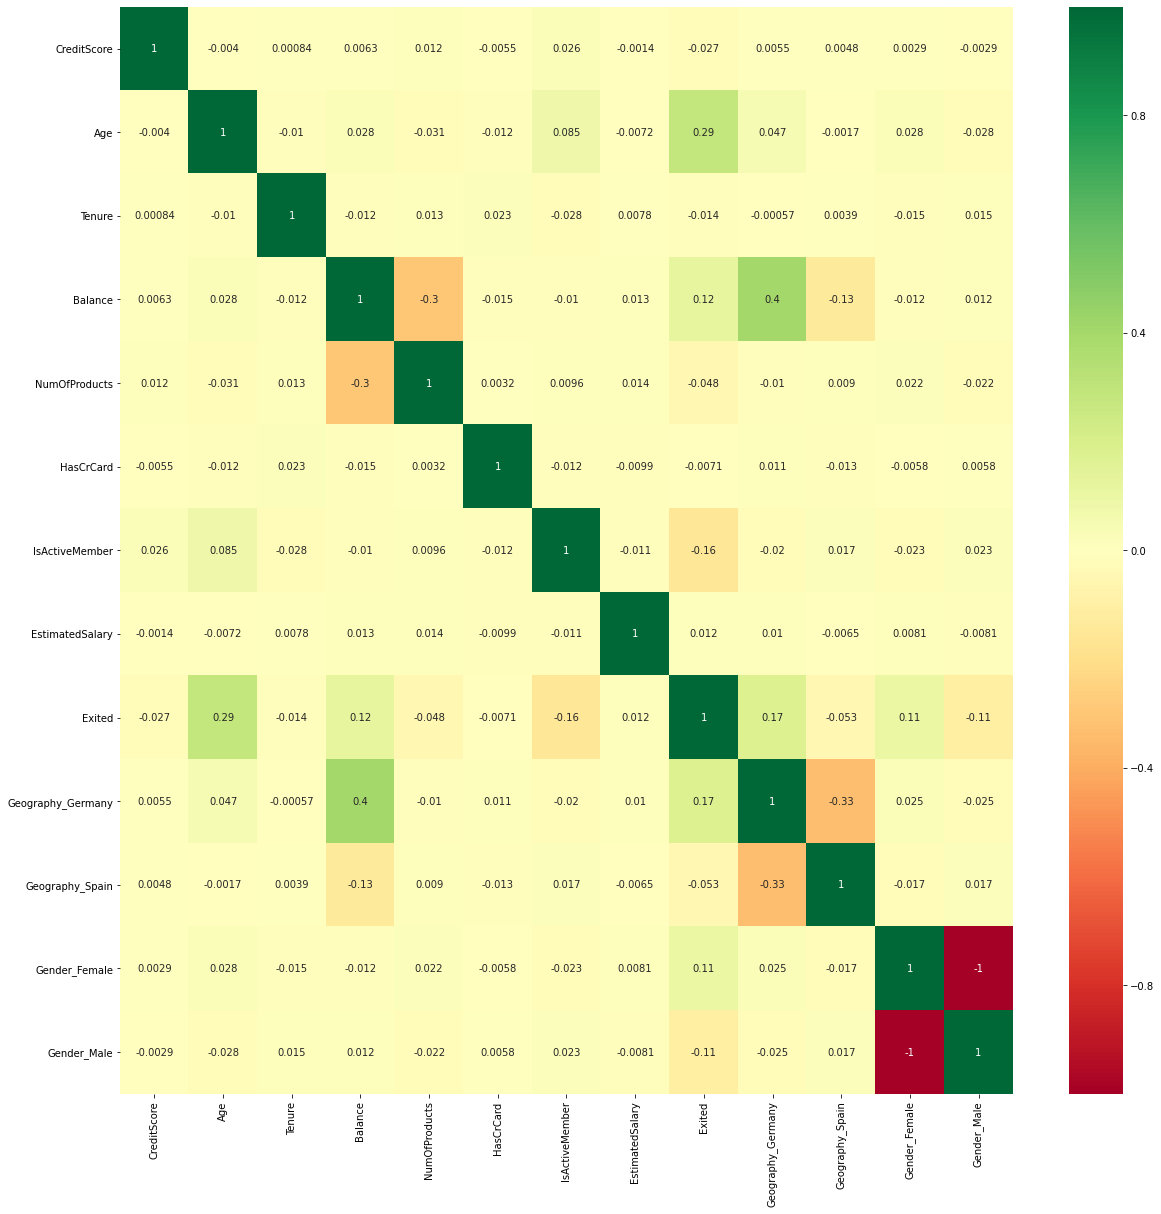

In [49]:
corrmat = bank_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(bank_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Changing all balances more than 0 to 1

In [50]:
bank_data['Balance'] = bank_data['Balance'].clip(upper=1)

In [51]:
bank_data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [52]:
bank_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.0,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,1.0,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,1.0,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.0,2,0,0,93826.63,0,0,0,1,0
4,850,43,2,1.0,1,1,1,79084.10,0,0,1,1,0


### standardize numerical variables

In [53]:
from sklearn.preprocessing import StandardScaler
bank_data[['CreditScore',  'Age']] = StandardScaler().fit_transform(bank_data[['CreditScore',  'Age']])

In [54]:
bank_data.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,2,0.0,1,1,1,101348.88,1,0,0,1,0
1,-0.440036,0.198164,1,1.0,1,0,1,112542.58,0,0,1,1,0
2,-1.536794,0.293517,8,1.0,3,1,0,113931.57,1,0,0,1,0
3,0.501521,0.007457,1,0.0,2,0,0,93826.63,0,0,0,1,0
4,2.063884,0.388871,2,1.0,1,1,1,79084.10,0,0,1,1,0
5,-0.057205,0.484225,8,1.0,2,1,0,149756.71,1,0,1,0,1
6,1.774174,1.056346,7,0.0,2,1,1,10062.80,0,0,0,0,1
7,-2.840488,-0.946079,4,1.0,4,1,0,119346.88,1,1,0,1,0
8,-1.547141,0.484225,4,1.0,2,0,1,74940.50,0,0,0,0,1
9,0.346319,-1.136786,2,1.0,1,1,1,71725.73,0,0,0,0,1


In [55]:
bank_data = pd.get_dummies(bank_data, columns = ["Tenure"])

In [56]:
bank_data = pd.get_dummies(bank_data, columns = ["NumOfProducts"])

In [57]:
bank_data.drop(['HasCrCard'], axis = 1, inplace = True)

In [58]:
bank_data.drop(['EstimatedSalary'], axis = 1, inplace = True)

In [59]:
bank_data.head()

,CreditScore,Age,Balance,IsActiveMember,Exited,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Tenure_0,...,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,-0.326221,0.293517,0.0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,-0.440036,0.198164,1.0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,-1.536794,0.293517,1.0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0.501521,0.007457,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2.063884,0.388871,1.0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [60]:
bank_data.loc[bank_data.Balance == 0.0, 'Balance'] = -1

In [61]:
bank_data.head()

,CreditScore,Age,Balance,IsActiveMember,Exited,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Tenure_0,...,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,-0.326221,0.293517,-1.0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,-0.440036,0.198164,1.0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,-1.536794,0.293517,1.0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0.501521,0.007457,-1.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2.063884,0.388871,1.0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [62]:
bank_data.loc[bank_data.IsActiveMember == 0, 'IsActiveMember'] = -1
bank_data.loc[bank_data.Geography_Germany == 0.0, 'Geography_Germany'] = -1
bank_data.loc[bank_data.Geography_Spain == 0.0, 'Geography_Spain'] = -1
bank_data.loc[bank_data.Gender_Female == 0.0, 'Gender_Female'] = -1
bank_data.loc[bank_data.Gender_Male == 0.0, 'Gender_Male'] = -1

In [63]:
bank_data.head()

,CreditScore,Age,Balance,IsActiveMember,Exited,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Tenure_0,...,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,-0.326221,0.293517,-1.0,1,1,255,255,1,255,0,...,0,0,0,0,0,0,1,0,0,0
1,-0.440036,0.198164,1.0,1,0,255,1,1,255,0,...,0,0,0,0,0,0,1,0,0,0
2,-1.536794,0.293517,1.0,-1,1,255,255,1,255,0,...,0,0,0,1,0,0,0,0,1,0
3,0.501521,0.007457,-1.0,-1,0,255,255,1,255,0,...,0,0,0,0,0,0,0,1,0,0
4,2.063884,0.388871,1.0,1,0,255,1,1,255,0,...,0,0,0,0,0,0,1,0,0,0


In [64]:
bank_data.loc[bank_data.Geography_Germany == 255.0, 'Geography_Germany'] = -1
bank_data.loc[bank_data.Geography_Spain == 255.0, 'Geography_Spain'] = -1
bank_data.loc[bank_data.Gender_Female == 255.0, 'Gender_Female'] = -1
bank_data.loc[bank_data.Gender_Male == 255.0, 'Gender_Male'] = -1

In [65]:
bank_data.loc[bank_data.Exited == 0, 'Exited'] = -1
bank_data.loc[bank_data.NumOfProducts_1 == 0, 'NumOfProducts_1'] = -1
bank_data.loc[bank_data.NumOfProducts_2 == 0, 'NumOfProducts_2'] = -1
bank_data.loc[bank_data.NumOfProducts_3 == 0, 'NumOfProducts_3'] = -1
bank_data.loc[bank_data.NumOfProducts_4 == 0, 'NumOfProducts_4'] = -1
bank_data.loc[bank_data.Tenure_0 == 0, 'Tenure_0'] = -1
bank_data.loc[bank_data.Tenure_1 == 0, 'Tenure_1'] = -1
bank_data.loc[bank_data.Tenure_2 == 0, 'Tenure_2'] = -1
bank_data.loc[bank_data.Tenure_3 == 0, 'Tenure_3'] = -1
bank_data.loc[bank_data.Tenure_4 == 0, 'Tenure_4'] = -1
bank_data.loc[bank_data.Tenure_5 == 0, 'Tenure_5'] = -1
bank_data.loc[bank_data.Tenure_6 == 0, 'Tenure_6'] = -1
bank_data.loc[bank_data.Tenure_7 == 0, 'Tenure_7'] = -1
bank_data.loc[bank_data.Tenure_8 == 0, 'Tenure_8'] = -1
bank_data.loc[bank_data.Tenure_9 == 0, 'Tenure_9'] = -1
bank_data.loc[bank_data.Tenure_10 == 0, 'Tenure_10'] = -1

In [66]:
bank_data.head()

,CreditScore,Age,Balance,IsActiveMember,Exited,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Tenure_0,...,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,-0.326221,0.293517,-1.0,1,1,-1,-1,1,-1,255,...,255,255,255,255,255,255,1,255,255,255
1,-0.440036,0.198164,1.0,1,-1,-1,1,1,-1,255,...,255,255,255,255,255,255,1,255,255,255
2,-1.536794,0.293517,1.0,-1,1,-1,-1,1,-1,255,...,255,255,255,1,255,255,255,255,1,255
3,0.501521,0.007457,-1.0,-1,-1,-1,-1,1,-1,255,...,255,255,255,255,255,255,255,1,255,255
4,2.063884,0.388871,1.0,1,-1,-1,1,1,-1,255,...,255,255,255,255,255,255,1,255,255,255


In [67]:
bank_data.loc[bank_data.NumOfProducts_1 == 255, 'NumOfProducts_1'] = -1
bank_data.loc[bank_data.NumOfProducts_2 == 255, 'NumOfProducts_2'] = -1
bank_data.loc[bank_data.NumOfProducts_3 == 255, 'NumOfProducts_3'] = -1
bank_data.loc[bank_data.NumOfProducts_4 == 255, 'NumOfProducts_4'] = -1
bank_data.loc[bank_data.Tenure_0 == 255, 'Tenure_0'] = -1
bank_data.loc[bank_data.Tenure_1 == 255, 'Tenure_1'] = -1
bank_data.loc[bank_data.Tenure_2 == 255, 'Tenure_2'] = -1
bank_data.loc[bank_data.Tenure_3 == 255, 'Tenure_3'] = -1
bank_data.loc[bank_data.Tenure_4 == 255, 'Tenure_4'] = -1
bank_data.loc[bank_data.Tenure_5 == 255, 'Tenure_5'] = -1
bank_data.loc[bank_data.Tenure_6 == 255, 'Tenure_6'] = -1
bank_data.loc[bank_data.Tenure_7 == 255, 'Tenure_7'] = -1
bank_data.loc[bank_data.Tenure_8 == 255, 'Tenure_8'] = -1
bank_data.loc[bank_data.Tenure_9 == 255, 'Tenure_9'] = -1
bank_data.loc[bank_data.Tenure_10 == 255, 'Tenure_10'] = -1

In [68]:
bank_data.head()

,CreditScore,Age,Balance,IsActiveMember,Exited,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Tenure_0,...,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,-0.326221,0.293517,-1.0,1,1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,-1
1,-0.440036,0.198164,1.0,1,-1,-1,1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,-1
2,-1.536794,0.293517,1.0,-1,1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,1,-1
3,0.501521,0.007457,-1.0,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,1,-1,-1
4,2.063884,0.388871,1.0,1,-1,-1,1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,-1


### Dividing the dataset into training and test set

In [69]:
Predictors = bank_data.drop(['Exited'], axis = 1)
Target = bank_data['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Predictors, Target, test_size = 0.20, random_state = 42)

### Feature Importance

/home/adarsh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.28566053 0.33961339 0.02653191 0.04432    0.03515438 0.02144025
 0.00744637 0.0064923  0.00558427 0.00925685 0.0075927  0.00933541
 0.00923127 0.00804681 0.0076878  0.00758247 0.00676216 0.00780662
 0.00547353 0.04303891 0.07051191 0.02490269 0.01052745]


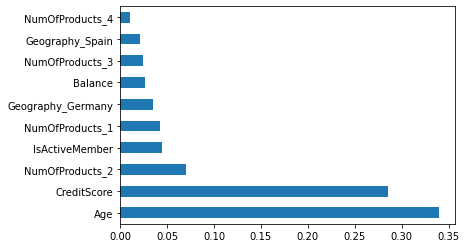

In [70]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [71]:
X_train.head()

,CreditScore,Age,Balance,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Tenure_0,Tenure_1,...,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
9254,0.367013,-0.660018,-1.0,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,1,-1,-1
1561,-0.191713,0.293517,1.0,1,1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,1,-1,-1
1670,-0.947028,-1.422847,1.0,-1,-1,1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,-1
6087,-0.926334,-1.136786,1.0,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,1,-1,1,-1,-1,-1
6669,-1.381593,1.628468,1.0,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,1,-1,1,-1,-1,-1


In [72]:
y_train.head()

9254   -1
1561   -1
1670    1
6087    1
6669    1
Name: Exited, dtype: int64

In [73]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 23)
(8000,)
(2000, 23)
(2000,)


### Building machine learning model for predicting churn

In [74]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [75]:
# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

In [76]:
# Fit logistic regression
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
log_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
log_Grid.fit(X_train,y_train)
best_model(log_Grid)

0.83975
{'C': 0.1, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=250,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-05, verbose=0,
                   warm_start=False)


In [77]:
# Fit best logistic regression
log_best = LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=250, multi_class='warn',n_jobs=None, 
                                penalty='l2', random_state=None, solver='lbfgs',tol=1e-05, verbose=0, warm_start=False)
log_best.fit(X_train,y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=250,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-05, verbose=0,
                   warm_start=False)

### Accuracy

In [78]:
y_test.head(10)

6252   -1
4684   -1
1731   -1
4742   -1
4521   -1
6340   -1
576    -1
5202    1
6363   -1
439    -1
Name: Exited, dtype: int64

In [79]:
X_test.head(10)

,CreditScore,Age,Balance,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Tenure_0,Tenure_1,...,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
6252,-0.564197,-0.660018,1.0,-1,1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,1,-1,-1
4684,-0.284834,0.388871,-1.0,1,-1,-1,-1,1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,1,-1,-1
1731,-0.512463,0.484225,-1.0,-1,-1,1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,1,-1,-1
4742,-1.495407,1.914528,1.0,1,1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,1,-1,-1
4521,-0.936681,-1.136786,1.0,1,-1,1,1,-1,-1,-1,...,-1,-1,1,-1,-1,-1,1,-1,-1,-1
6340,1.443077,-0.183251,-1.0,1,-1,1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,1,-1,-1
576,-2.188641,-0.660018,1.0,-1,-1,1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,-1
5202,-0.553850,-1.613554,1.0,-1,1,-1,1,-1,-1,-1,...,-1,1,-1,-1,-1,-1,1,-1,-1,-1
6363,0.284238,0.102810,1.0,-1,-1,1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,-1
439,-1.929972,0.293517,1.0,1,1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,-1


In [80]:
y_pred = log_best.predict(X_test) 
print(':',"%.3f" % accuracy_score(y_pred, y_test))

: 0.846


### Confusion matrix

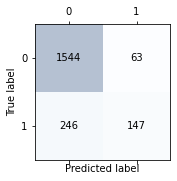

In [81]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,s=confmat[i, j],va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [82]:
roc_auc_score(y_test, y_pred)

0.6674211583862587

In [83]:
# Fit logistic regression with degree 2 polynomial kernel
param_grid = {'C': [0.1,10,50], 'max_iter': [300,500], 'fit_intercept':[True],'intercept_scaling':[1],'penalty':['l2'],
              'tol':[0.0001,0.000001]}
poly2 = PolynomialFeatures(degree=2)
log_pol2_Grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5, refit=True, verbose=0)
log_pol2_Grid.fit(X_train,y_train)
best_model(log_pol2_Grid)

0.84025
{'C': 10, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 300, 'penalty': 'l2', 'tol': 0.0001}
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [84]:
# Fit best_logistic regression with pol 2 kernel
poly2 = PolynomialFeatures(degree=2)
log_pol2 = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=300, multi_class='warn', n_jobs=None, 
                              penalty='l2', random_state=None, solver='liblinear',tol=0.0001, verbose=0, warm_start=False)
log_pol2.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Accuracy

In [85]:
y_pred_1 = log_pol2.predict(X_test) 
print(':',"%.3f" % accuracy_score(y_pred_1, y_test))

: 0.845


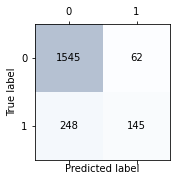

In [86]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred_1)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,s=confmat[i, j],va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [87]:
roc_auc_score(y_test, y_pred_1)

0.6651877678920626

In [88]:
# Fit SVM with RBF Kernel
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(X_train,y_train)
best_model(SVM_grid)

0.85625
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf', 'probability': True}
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [89]:
# Fit best_SVM with RBF Kernel
SVM_RBF = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf', max_iter=-1, probability=True, 
              random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF.fit(X_train,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

### Accuracy

In [90]:
y_pred_2 = SVM_RBF.predict(X_test) 
print(':',"%.3f" % accuracy_score(y_pred_2, y_test))

: 0.865


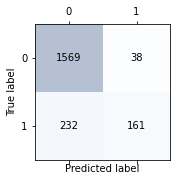

In [91]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred_2)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,s=confmat[i, j],va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [92]:
roc_auc_score(y_test, y_pred_2)

0.6930113324181262

In [ ]:
# Fit SVM with pol kernel
param_grid = {'C': [0.5,1,10,50,100], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['poly'],'degree':[2,3] }
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(X_train, y_train)
best_model(SVM_grid)

In [ ]:
# Fit best_SVM with Pol Kernel
SVM_POL = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',  max_iter=-1,
              probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)
SVM_POL.fit(X_train, y_train)

### Accuracy

In [ ]:
y_pred_3 = SVM_POL.predict(X_test) 
print(':',"%.3f" % accuracy_score(y_pred_3, y_test))

In [ ]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred_3)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,s=confmat[i, j],va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
# Fit random forest classifier
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RanFor_grid.fit(X_train, y_train)
best_model(RanFor_grid)

In [ ]:
# Fit best_Random Forest classifier
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=6, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_impurity_split=None,min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
RF.fit(X_train, y_train)

### Accuracy

In [ ]:
y_pred_4 = SVM_POL.predict(X_test) 
print(':',"%.3f" % accuracy_score(y_pred_4, y_test))

In [ ]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred_4)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,s=confmat[i, j],va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
# Fit Extreme Gradient boosting classifier
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(X_train, y_train)
best_model(xgb_grid)

In [ ]:
# Fit best_Extreme Gradient Boost Classifier
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.001, learning_rate=0.1, max_delta_step=0,max_depth=6,
                    min_child_weight=5, missing=None, n_estimators=100,n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0, 
                    reg_lambda=1, scale_pos_weight=1, seed=None, silent=True, subsample=1)
XGB.fit(X_train, y_train)

### Accuracy

In [ ]:
y_pred_5 = SVM_POL.predict(X_test) 
print(':',"%.3f" % accuracy_score(y_pred_5, y_test))

In [ ]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred_5)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,s=confmat[i, j],va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()